In [1]:
%matplotlib inline
import pymc as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


#### Code 3.1

$$Pr(vampire|positive) = \frac{Pr(positive|vampire) Pr(vampire)} {Pr(positive)}$$

$$Pr(positive) = Pr(positive|vampire) Pr(vampire) + Pr(positive|mortal) 1 − Pr(vampire)$$

In [2]:
PrPV = 0.95
PrPM = 0.01
PrV = 0.001
PrP = PrPV * PrV + PrPM * (1 - PrV)
PrVP = PrPV * PrV / PrP
PrVP

0.08683729433272395

#### Code 3.2 - 3.5

We are goint to use the same function we use on chapter 2 (code 2.3)

In [ ]:
def posterior_grid_approx(grid_points=100, success=6, trials_of_10_trials_of_10_trials_of_10_trials_of_10_trials_of_10_trials_of_10_trials_of_10_trials_of_10_trials_of_10_tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [4]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

print(samples)

[0.6969697  0.39393939 0.42424242 ... 0.55555556 0.4040404  0.64646465]


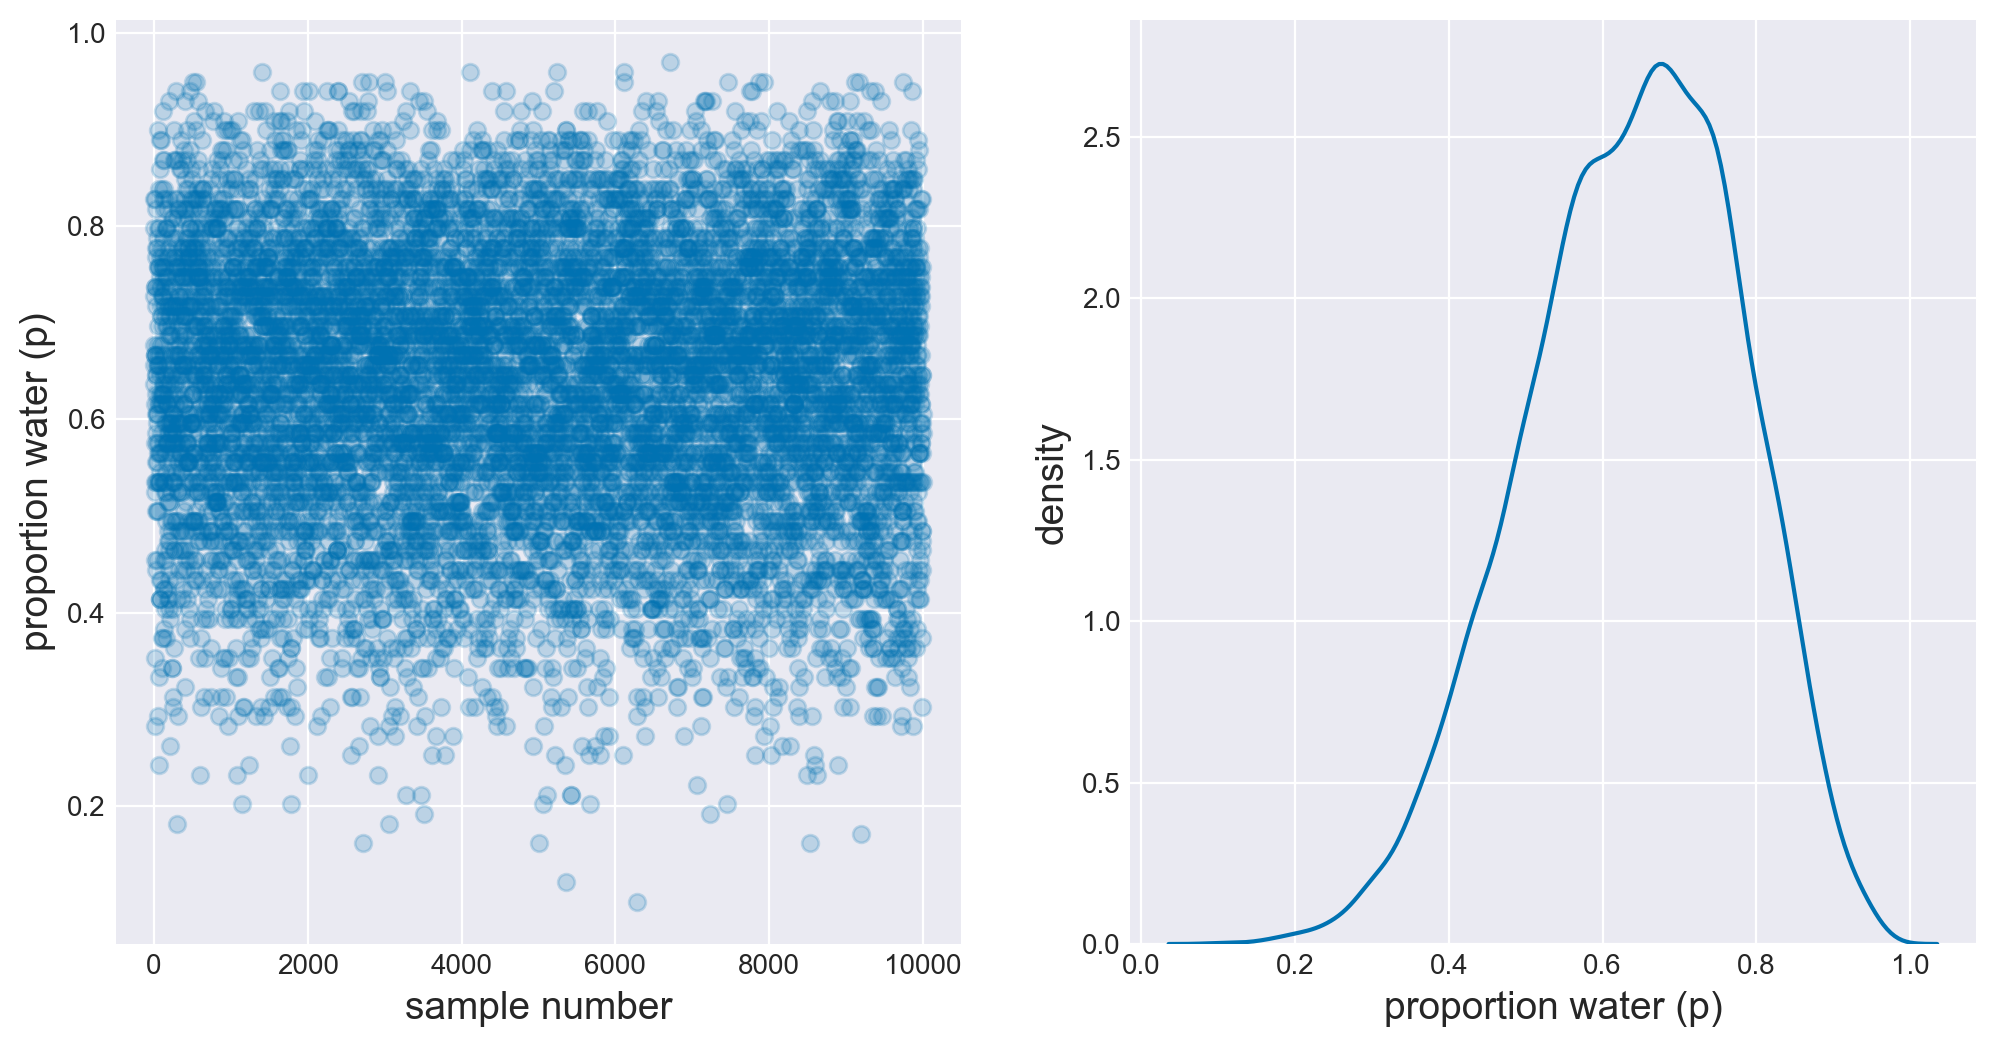

In [127]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(samples, 'o', alpha=0.2)
ax0.set_xlabel('sample number', fontsize=14)
ax0.set_ylabel('proportion water (p)', fontsize=14)
sns.kdeplot(samples, ax=ax1)
ax1.set_xlabel('proportion water (p)', fontsize=14)
ax1.set_ylabel('density', fontsize=14);

#### Code 3.6

Samples less than .5 probability: 0.17180


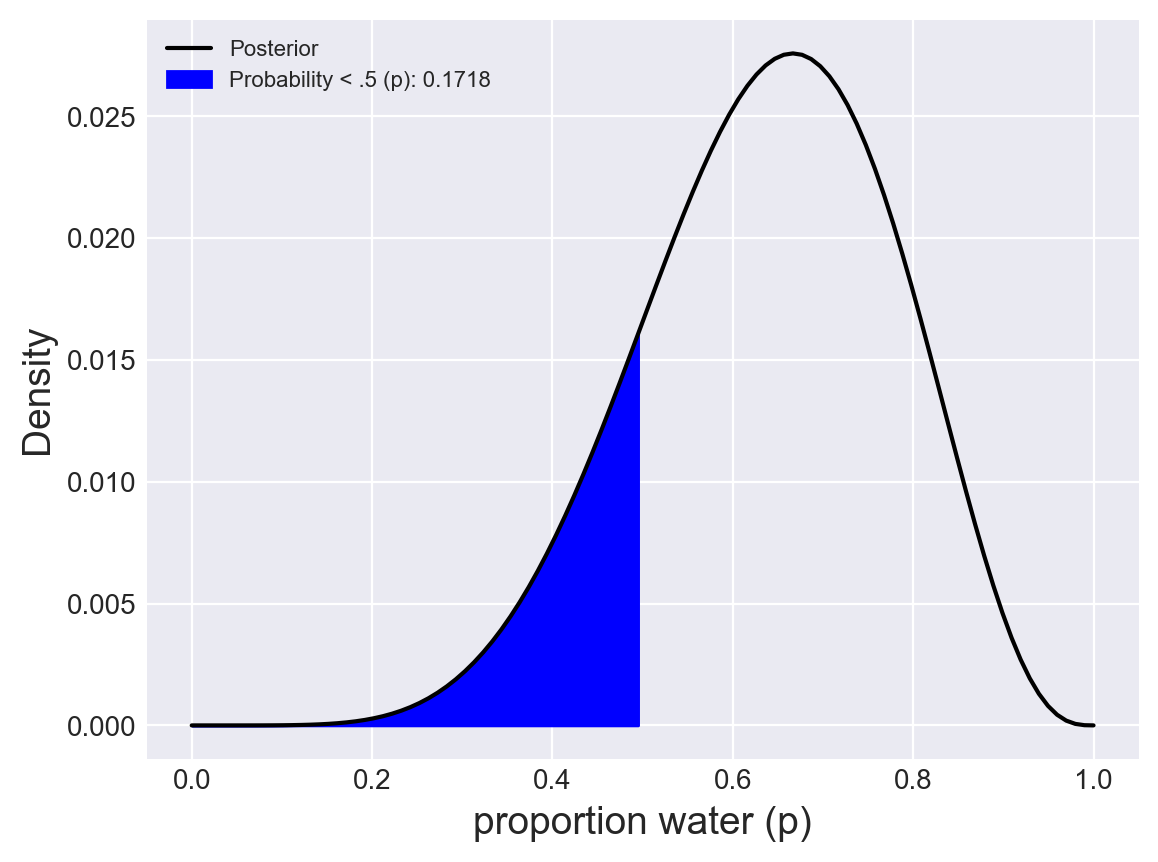

In [140]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

p_grid_less_than_point_5 = sum(posterior[ p_grid < 0.5 ])

p_grid_less_than_point_5_rounded = np.round(p_grid_less_than_point_5, 4)

print(f'Samples less than .5 probability: {p_grid_less_than_point_5_rounded:.5f}')

plt.plot(p_grid, posterior, color='black', label = 'Posterior')
plt.xlabel("proportion water (p)", fontsize= 14)
plt.ylabel("Density", fontsize=14)
plt.fill_between(p_grid, posterior, where=(p_grid < .5), color = 'blue', label=f'Probability < .5 (p): {p_grid_less_than_point_5_rounded:.4f}')

plt.legend(fontsize = 8)

plt.show();

#### Code 3.7

Samples less than .5 probability: 0.17570


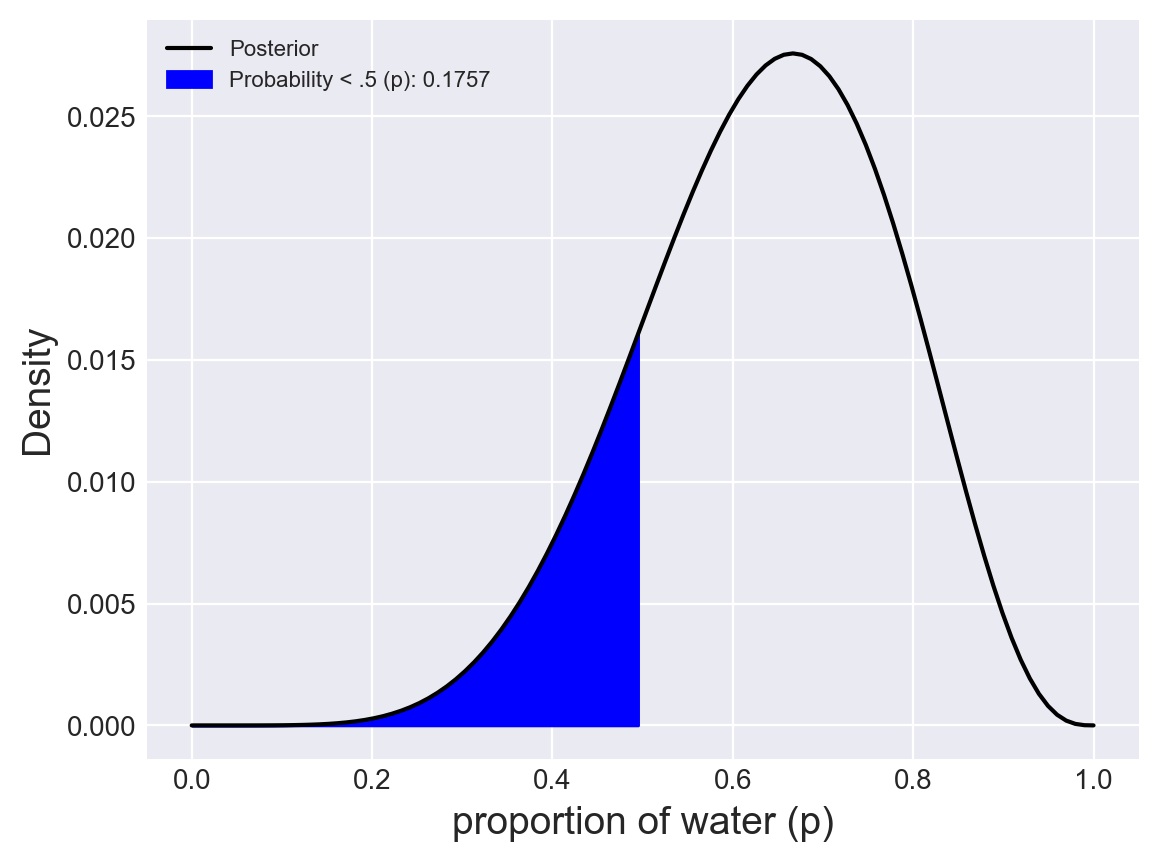

In [338]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

samples_under_point_5 = sum( samples < 0.5) / len(samples)


print(f'Samples less than .5 probability: {samples_under_point_5:.5f}')

plt.plot(p_grid, posterior, color='black', label = 'Posterior')
plt.xlabel("proportion of water (p)", fontsize= 14)
plt.ylabel("Density", fontsize=14)
plt.fill_between(p_grid, posterior, where=(p_grid < .5), color = 'blue', label=f'Probability < .5 (p): {samples_under_point_5}')

plt.legend(fontsize = 8)

plt.show();

#### Code 3.8

Samples between 50% and 75% probability: 0.61510


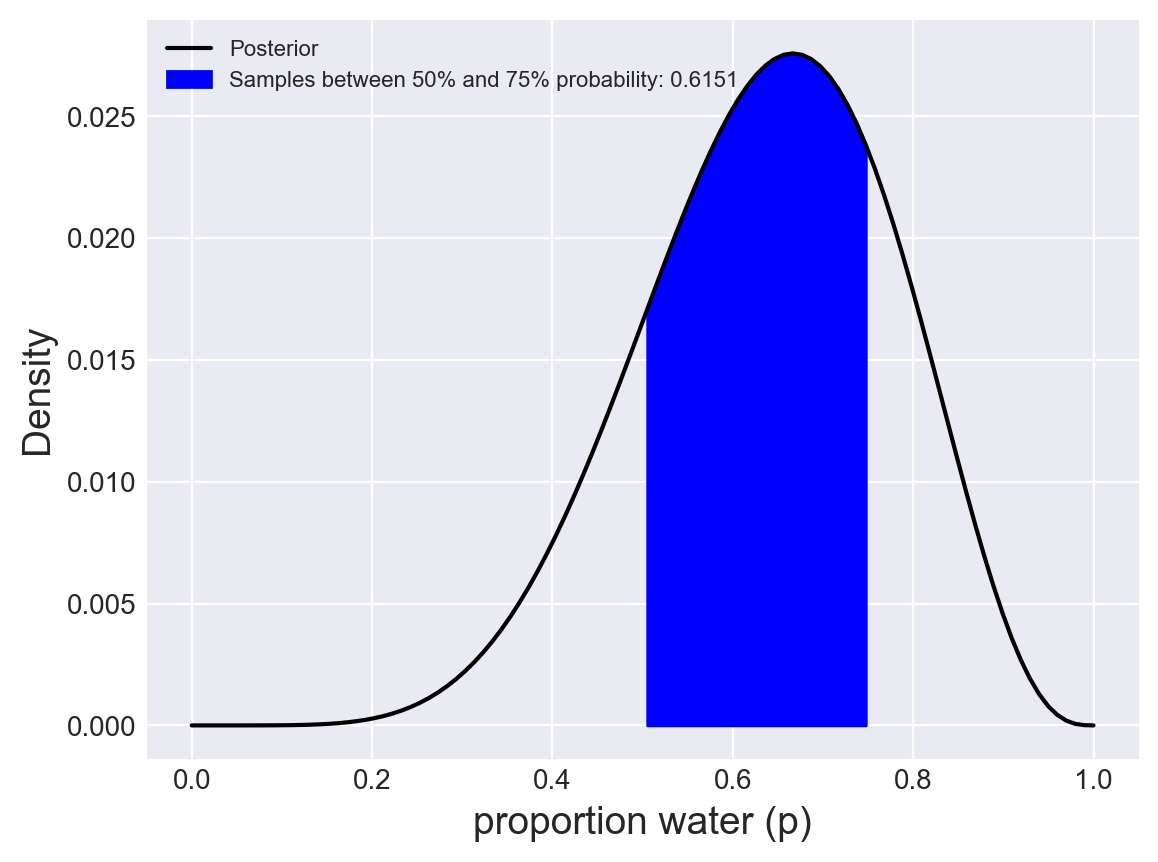

In [137]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

lower = .5
upper = .75
samples_between_50_and_75 = sum((samples > lower) & (samples < upper)) / 1e4
print(f'Samples between 50% and 75% probability: {samples_between_50_and_75:.5f}')


plt.plot(p_grid, posterior, color= 'black', label = 'Posterior')
plt.xlabel('proportion water (p)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.fill_between(p_grid, posterior, where=(p_grid < upper) & (p_grid > lower), color = 'blue', label = f'Samples between 50% and 75% probability: {samples_between_50_and_75:.4f}')

plt.legend(loc = 'upper left',fontsize=8);


#### Code 3.9

Lower 80th percentile of samples: 0.76768


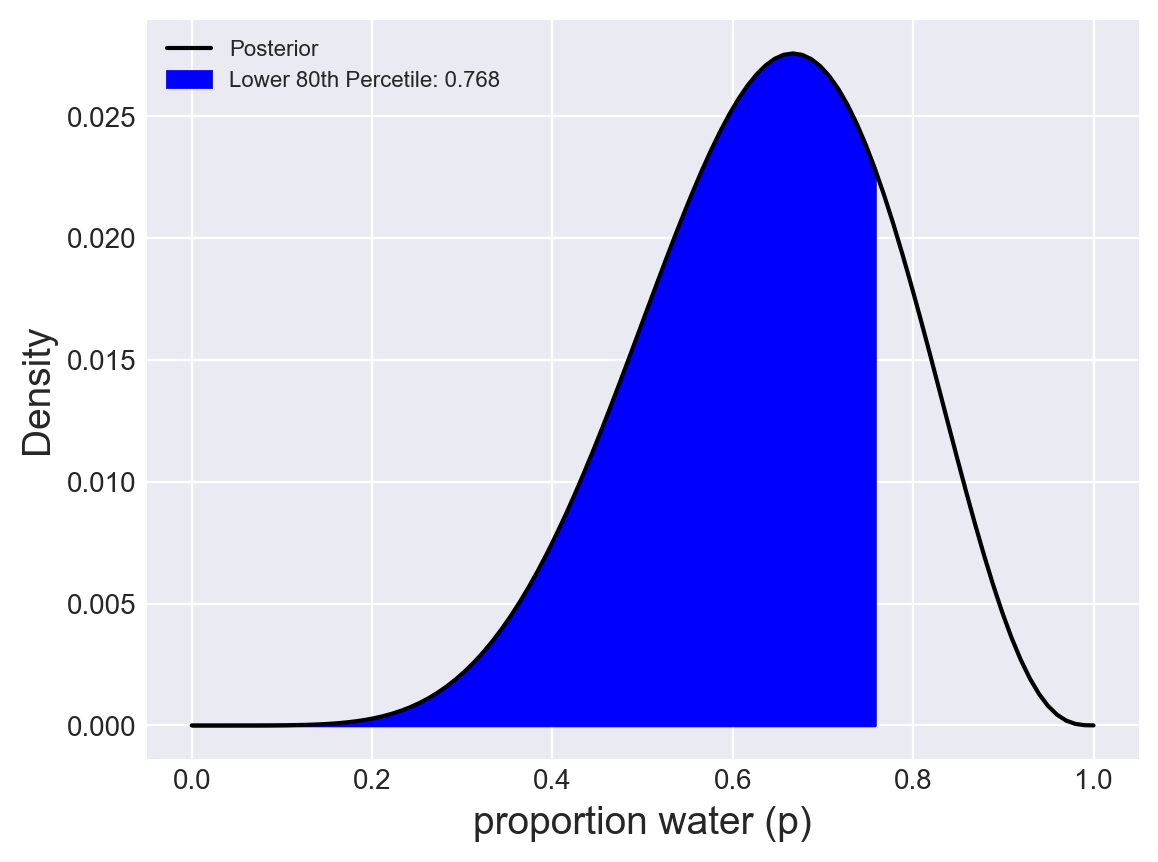

In [133]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

eightieth_percentile = np.percentile(samples, 80)

print(f'Lower 80th percentile of samples: {eightieth_percentile:.5f}')


plt.plot(p_grid, posterior, color= 'black', label = 'Posterior')
plt.xlabel('proportion water (p)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.fill_between(p_grid, posterior, where=(p_grid < eightieth_percentile), color = 'blue', label = f'Lower 80th Percetile: {eightieth_percentile:.3f}')

plt.legend(loc = 'upper left',fontsize=8);


#### Code 3.10

Middle 80th Percentile: 
 10th Percentile: 0.45455 
 90th Percentile: 0.81818


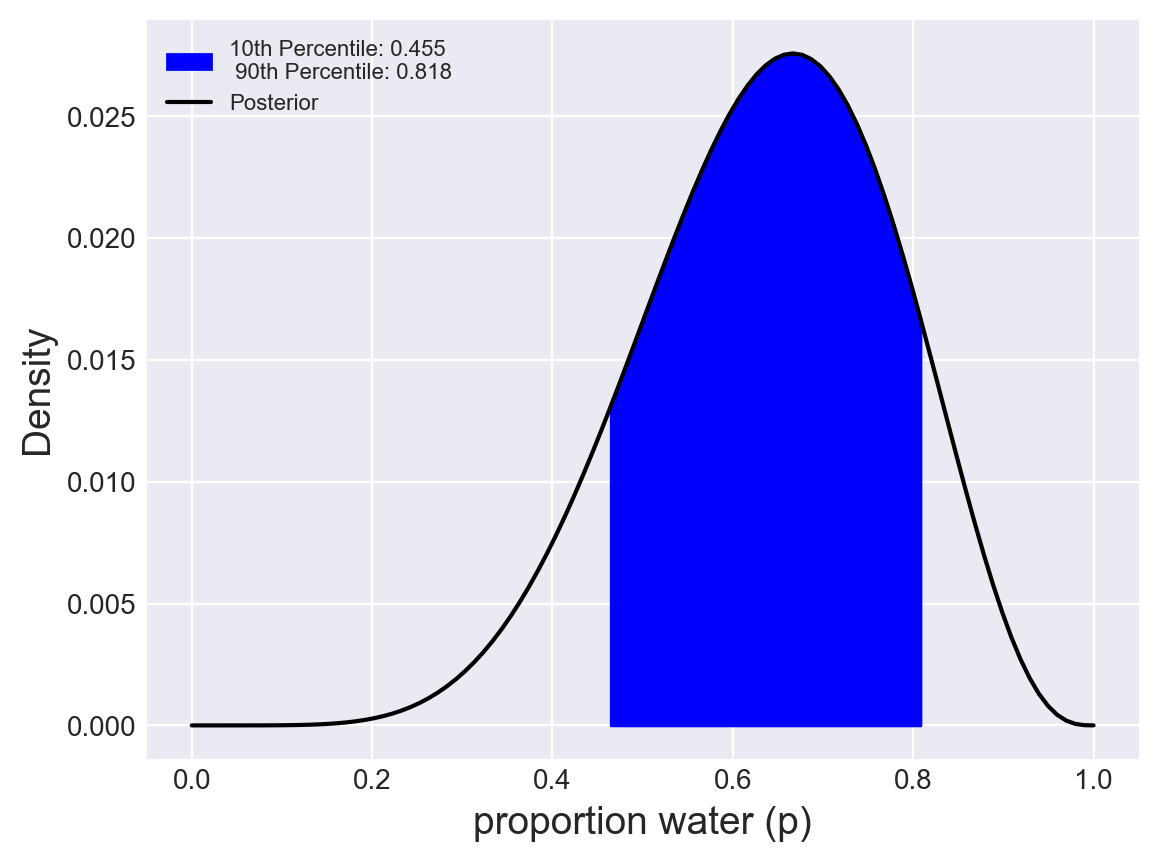

In [143]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
lower, upper = np.percentile(samples, [10, 90])


print(f'Middle 80th Percentile: \n 10th Percentile: {lower:.5f} \n 90th Percentile: {upper:.5f}')


plt.xlabel('proportion water (p)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.fill_between(p_grid, posterior, where=(p_grid < upper) & (p_grid > lower), color = 'blue', label = f'10th Percentile: {lower:.3f} \n 90th Percentile: {upper:.3f}')
plt.plot(p_grid, posterior, color= 'black', label = 'Posterior');

plt.legend(loc = 'upper left',fontsize=8);

#### Code 3.11

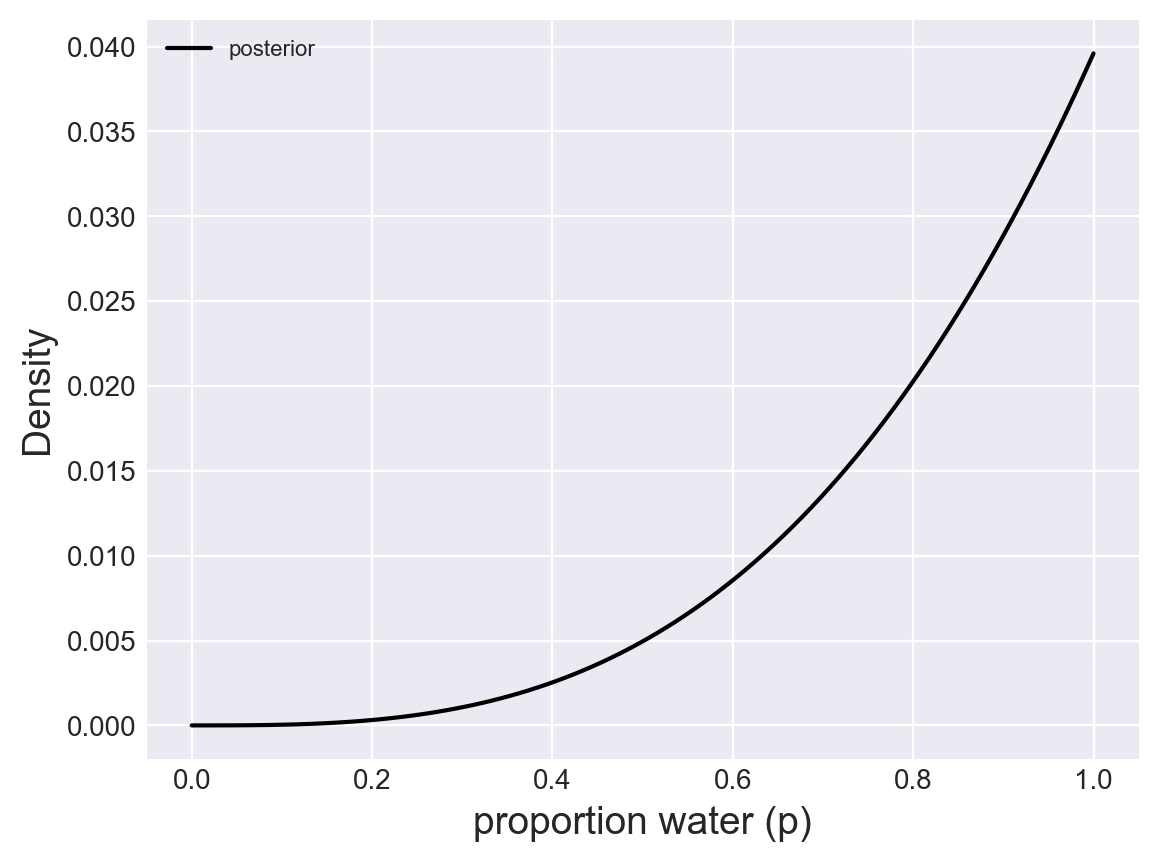

In [152]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=3, tosses=3)

plt.plot(p_grid, posterior, label = 'posterior', color ='black')
plt.xlabel('proportion water (p)', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.legend(fontsize=8);

#### Code 3.12

Middle 50th Percentile
Lower: 0.71717
Upper: 0.92929


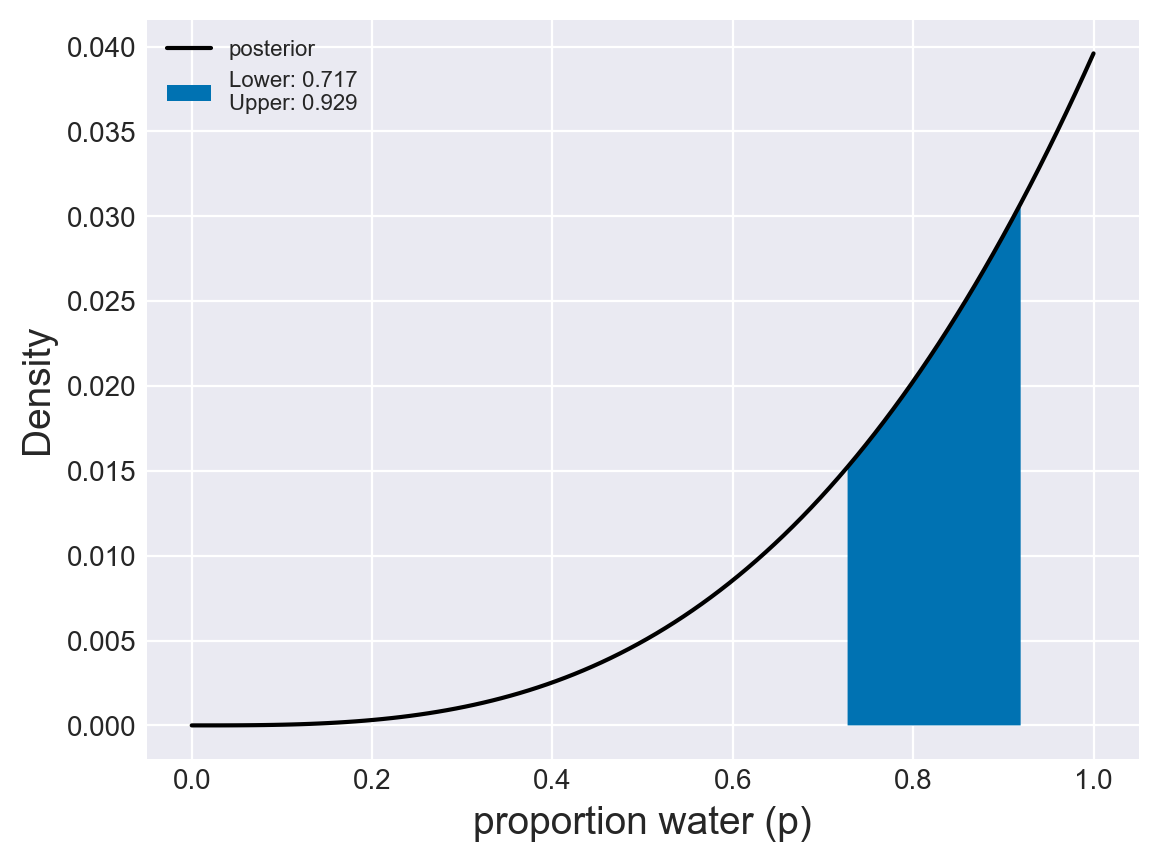

In [154]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=3, tosses=3)
lower, upper = np.percentile(samples, [25, 75])

print(f'Middle 50th Percentile\nLower: {lower:.5f}\nUpper: {upper:.5f}')

plt.plot(p_grid, posterior, label = 'posterior', color ='black')
plt.xlabel('proportion water (p)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.fill_between(p_grid, posterior, where=(p_grid > lower) & (p_grid < upper), label=f'Lower: {lower:.3f}\nUpper: {upper:.3f}');

plt.legend(fontsize=8);

#### Code 3.13

Highest Probability Density Interval (0.5): 
Lower: 0.84848 
Upper: 1.00000


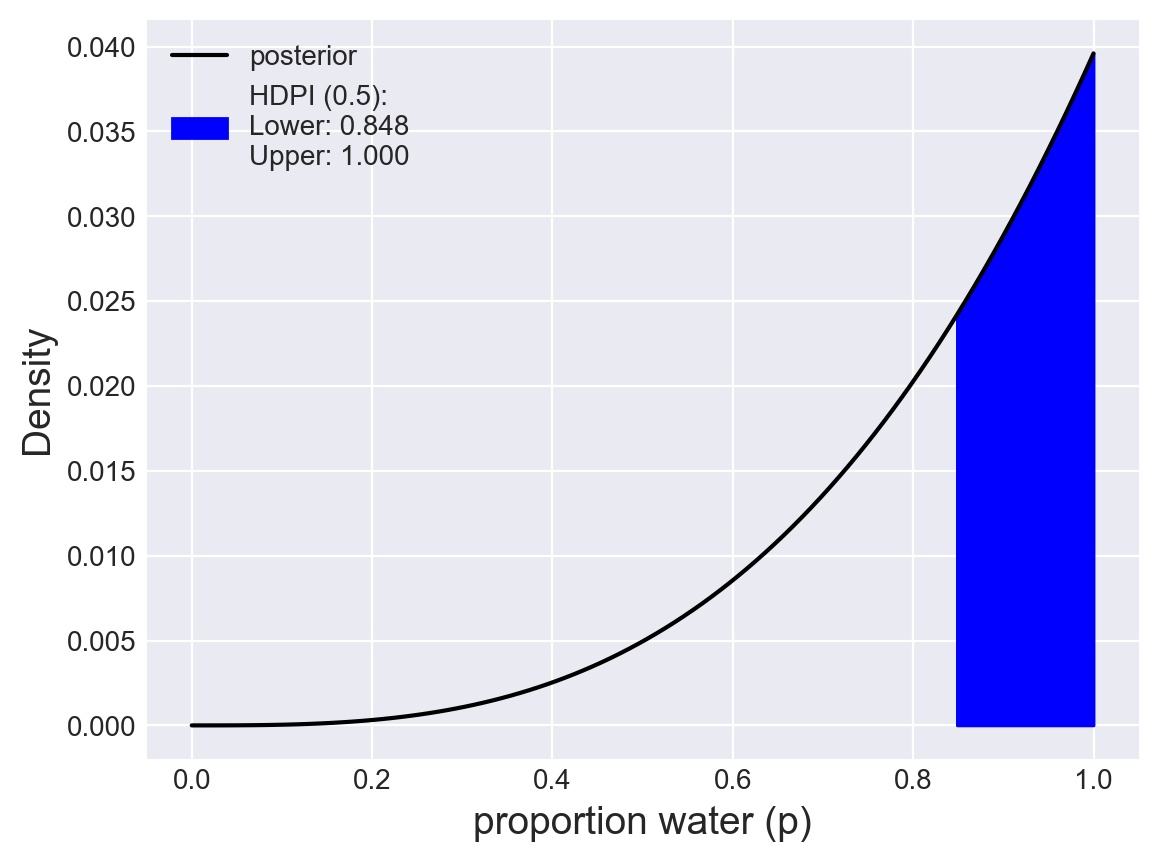

In [ ]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=3, tosses=3)


hdi_prob = .5 #change this to see different width's of the "probability slice"
lower, upper = az.hdi(samples, hdi_prob=hdi_prob)

print(f'Highest Probability Density Interval ({hdi_prob}): \nLower: {lower:.5f} \nUpper: {upper:.5f}')

plt.plot(p_grid, posterior, color="black", label = 'posterior')
plt.xlabel('proportion water (p)', fontsize= 14)
plt.ylabel('Density', fontsize= 14)

plt.fill_between(p_grid, posterior, 
                 where=(p_grid >= lower) & (p_grid <= upper),  
                 color = 'blue', 
                 label = f'HDPI ({hdi_prob}): \nLower: {lower:.3f} \nUpper: {upper:.3f}')

plt.legend();

#### Code 3.14

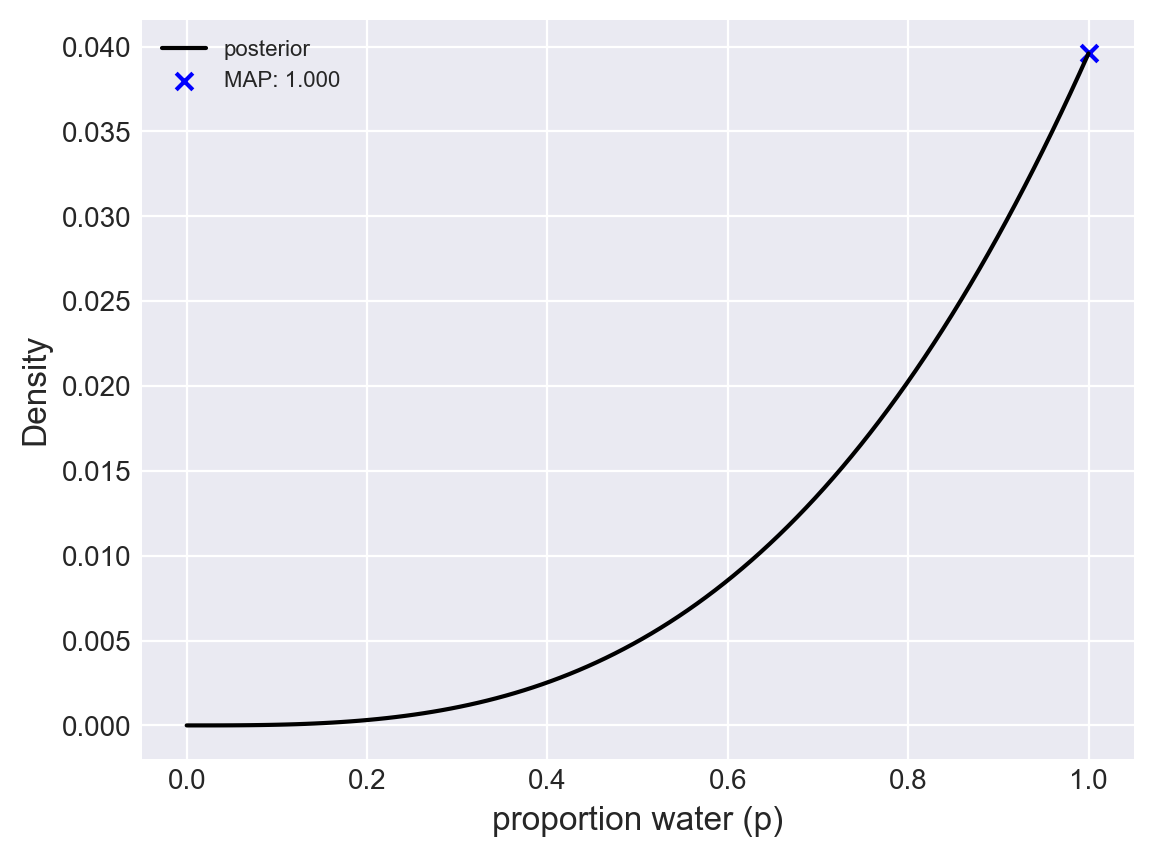

In [199]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=3, tosses=3)
samples = np.random.choice(p_grid, p = posterior, size = int(1e4), replace =True)

MAP = p_grid[posterior == max(posterior)].item()

plt.plot(p_grid, posterior, color = 'black', label = 'posterior');

plt.xlabel('proportion water (p)', fontsize =12)
plt.ylabel('Density', fontsize=12)

plt.scatter(MAP, np.max(posterior), color='blue', marker = 'x', label = f'MAP: {MAP:.3f}');

plt.legend(fontsize=8, loc = 'upper left');

#### Code 3.15

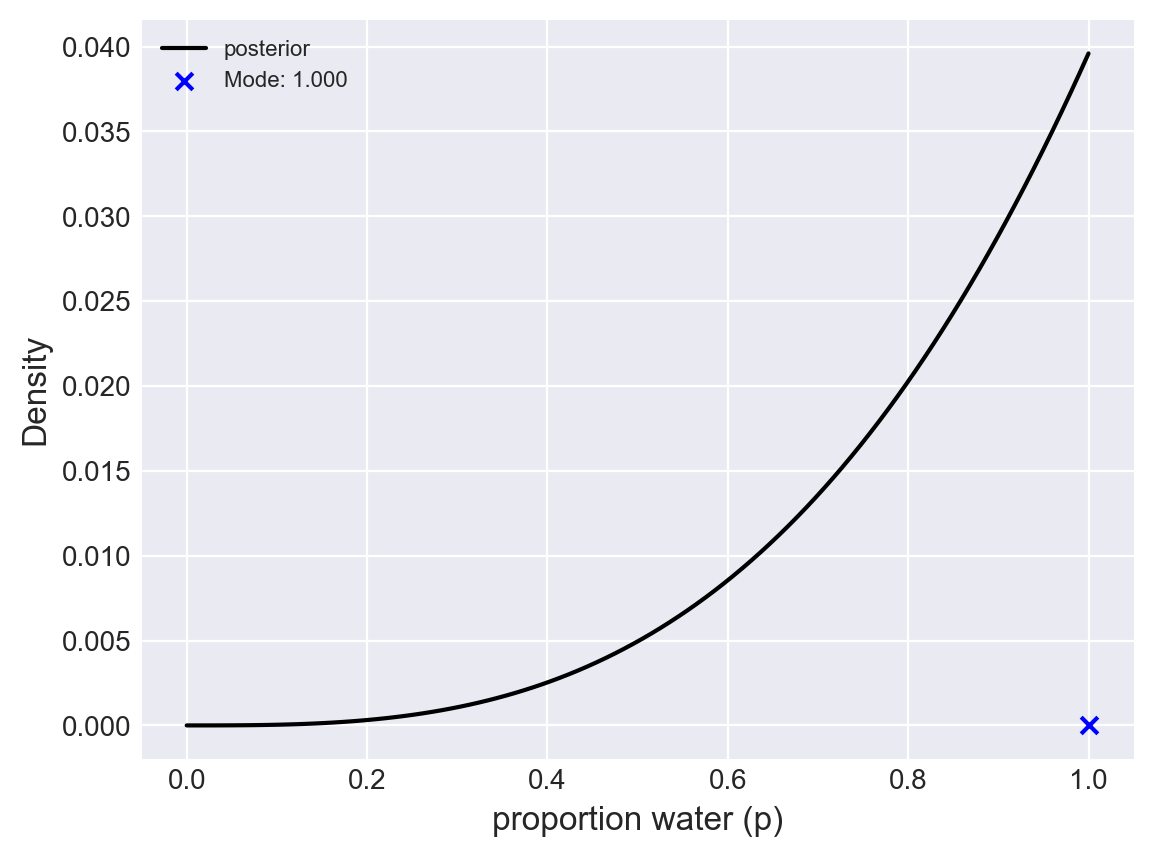

In [200]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=3, tosses=3)
samples = np.random.choice(p_grid, p = posterior, size = int(1e4), replace =True)

mode = stats.mode(samples)[0]

plt.plot(p_grid, posterior, color = 'black', label = 'posterior');

plt.xlabel('proportion water (p)', fontsize =12)
plt.ylabel('Density', fontsize=12)

plt.scatter(mode, stats.mode(p_grid)[0], color='blue', marker = 'x', label = f'Mode: {MAP:.3f}');

plt.legend(fontsize=8, loc = 'upper left');

#### Code 3.16

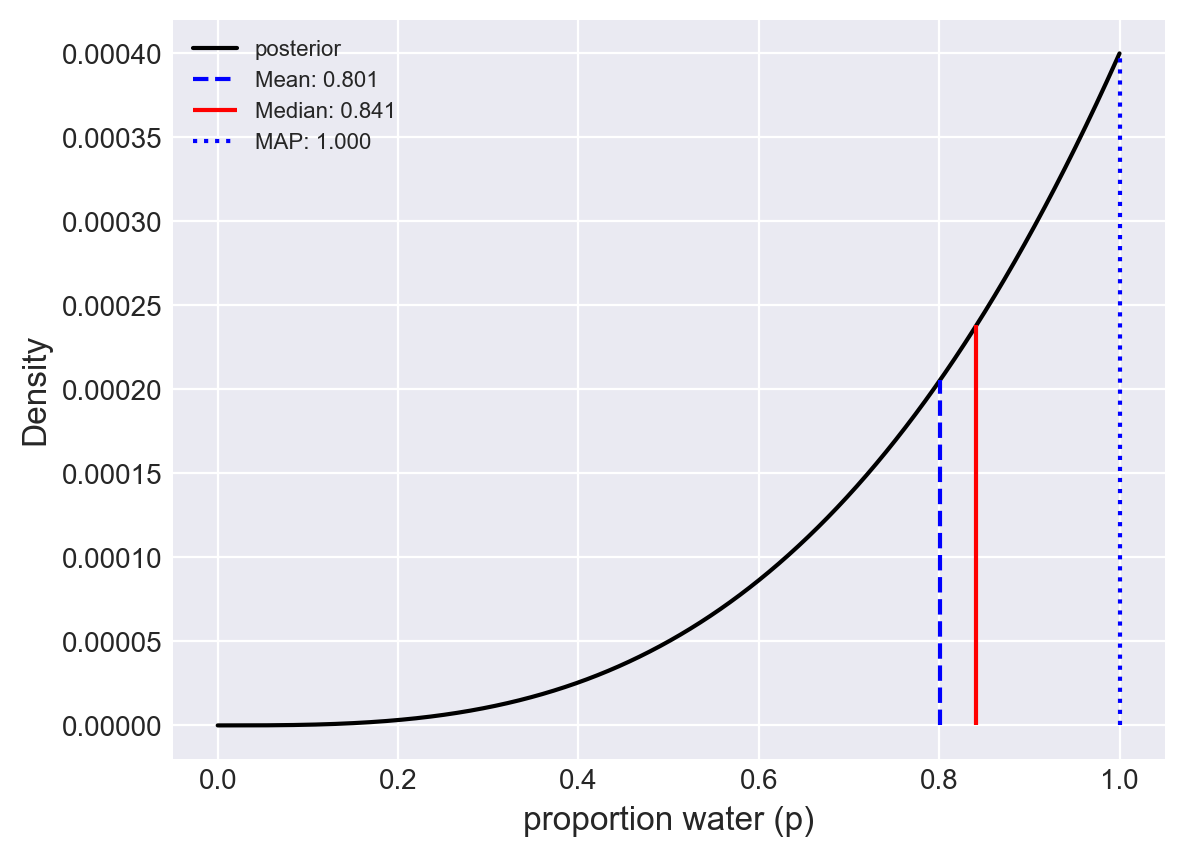

In [252]:
p_grid, posterior = posterior_grid_approx(grid_points=10000, success=3, tosses=3)
samples = np.random.choice(p_grid, p = posterior, size = int(1e4), replace =True)

mean, median = np.mean(samples), np.median(samples)

plt.plot(p_grid, posterior, color = 'black', label = 'posterior');

plt.xlabel('proportion water (p)', fontsize =12)
plt.ylabel('Density', fontsize=12)

plt.vlines(mean, ymin = 0, ymax = posterior[np.abs(np.abs(p_grid - mean).argmin())], color='blue', linestyles = 'dashed', label = f'Mean: {mean:.3f}');
plt.vlines(median, ymin = 0, ymax = posterior[np.abs(np.abs(p_grid - median).argmin())], color='red', linestyles = 'solid', label = f'Median: {median:.3f}');
plt.vlines(MAP, ymin= 0, ymax = np.max(posterior), color='blue', linestyles= 'dotted', label = f'MAP: {MAP:.3f}');

plt.legend(fontsize=8, loc = 'upper left');

#### Code 3.17

In [209]:
guess = .5

diff = sum(posterior * abs(guess - p_grid))

print(f'You guessed {guess}.  That is {diff:.3f} away.  You\'d have lost ${100 * diff:.3f}')

You guessed 0.5.  That is 0.316 away.  You'd have lost $31.627


#### Code 3.18 and 3.19

[0.804013331972928, 0.7939123218719178, 0.7838113125953956, 0.7737103099147788, 0.7636093294953411, 0.7535084018431432, 0.7434075772519605, 0.733306930750212, 0.7232065670478894, 0.713106625483485, 0.7030072849709212, 0.6929087689464793, 0.6828113503157274, 0.6727153564004497, 0.6626211738855755, 0.6525292537661073, 0.6424401162940496, 0.6323543559253385, 0.6222726462667693, 0.612195745022926, 0.6021244989431094, 0.5920598487682663, 0.5820028341779183, 0.5719545987370904, 0.5619163948432391, 0.551889588673182, 0.5418756651300268, 0.5318762327900988, 0.52189302884987, 0.511927924072889, 0.5019829277367079, 0.4920601925798131, 0.48216201974855166, 0.4722908637440625, 0.4624493373692026, 0.4526402166754783, 0.4428664459099722, 0.433131142462272, 0.42343760181140044, 0.41378930247274287, 0.4041899109449768, 0.39464328665699955, 0.3851534869148582, 0.3757247718486776, 0.3663616093595893, 0.35706868006665987, 0.3478508822538207, 0.33871333681679566, 0.32966139221003016, 0.3207006293936199, 0

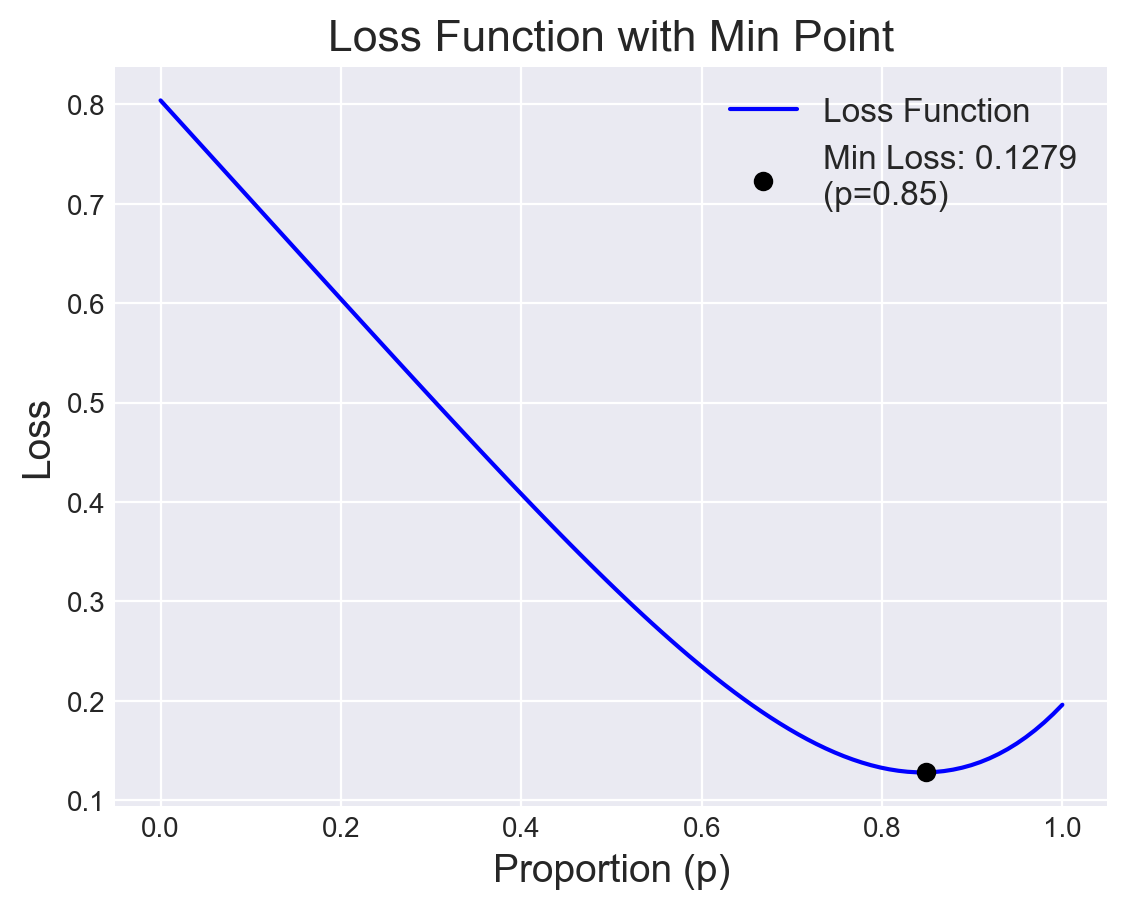

In [210]:
loss = [sum(posterior * abs(p - p_grid)) for p in p_grid]
print(loss)
min_loss = np.min(loss)
min_p = p_grid[np.argmin(loss)]

# Plot the loss curve
plt.plot(p_grid, loss, label="Loss Function", color="blue")

# Plot the minimum point
plt.scatter(min_p, min_loss, color="black", label=f"Min Loss: {min_loss:.4f}\n(p={min_p:.2f})", zorder=5)

# Add labels, legend, and title
plt.xlabel("Proportion (p)", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Loss Function with Min Point", fontsize=16)
plt.legend(fontsize=12)

# Show the plot
plt.show();

#### Code 3.20

In [99]:
stats.binom.pmf(range(3), n=2, p=0.9)

array([0.01, 0.18, 0.81])

#### Code 3.21

In [68]:
stats.binom.rvs(n=2, p=0.7, size=5)

array([1, 2, 0, 2, 1])

#### Code 3.22

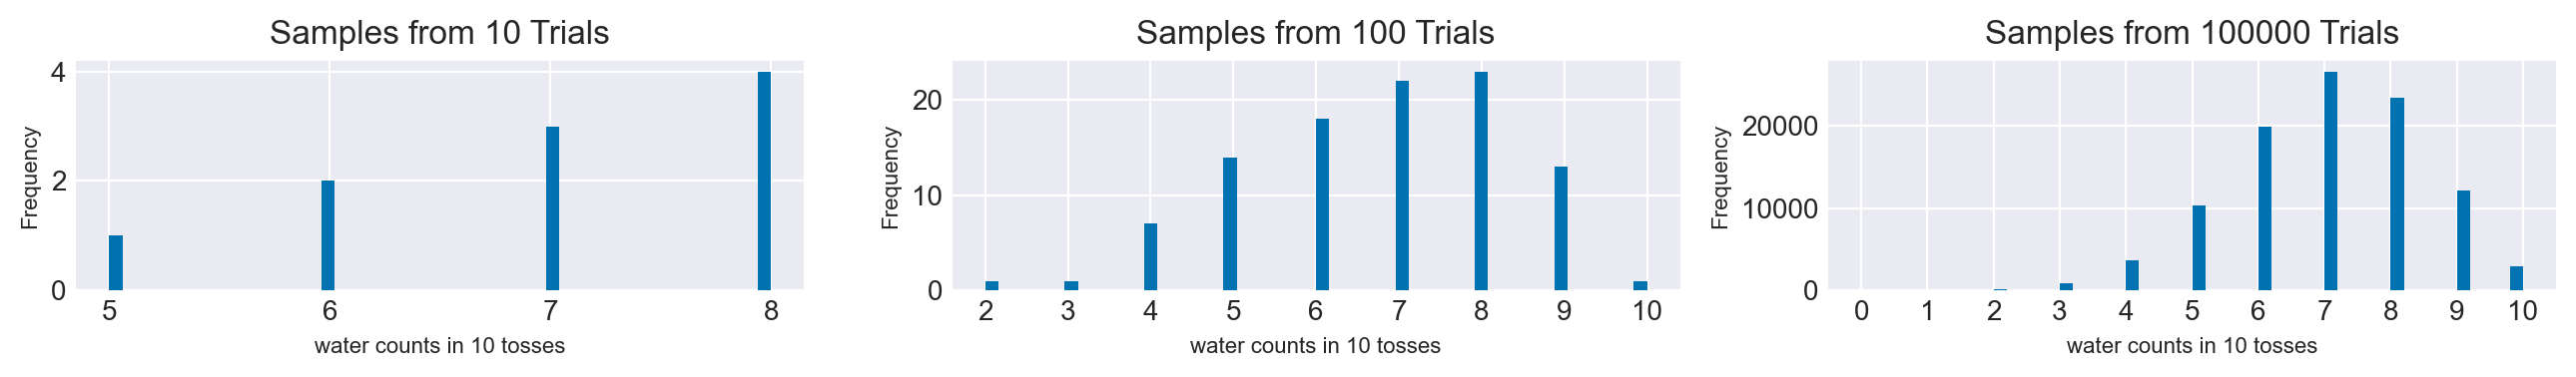

In [234]:
samples_from_10_trials_of_10_tosses = stats.binom.rvs(n=10, p=0.7, size=int(10))

samples_from_100_trials_of_10_tosses = stats.binom.rvs(n=10, p=0.7, size=int(100))

samples_from_100000_trials_of_10_tosses = stats.binom.rvs(n=10, p=0.7, size=int(1e5))

fig, axes = plt.subplots(1, 3, figsize = (13,2))

#10 Trial Graph
axes[0].hist(samples_from_10_trials_of_10_tosses, bins =50);
axes[0].set_title('Samples from 10 Trials')
axes[0].set_xticks(np.unique(samples_from_10_trials_of_10_tosses))
axes[0].set_xlabel('water counts in 10 tosses', fontsize =8)
axes[0].set_ylabel('Frequency', fontsize =8);

#1000 Trial Graph
axes[1].hist(samples_from_100_trials_of_10_tosses, bins =50);
axes[1].set_title('Samples from 100 Trials')
axes[1].set_xticks(np.unique(samples_from_100_trials_of_10_tosses))
axes[1].set_xlabel('water counts in 10 tosses', fontsize =8)
axes[1].set_ylabel('Frequency', fontsize =8);

#100000 Trial Graph
axes[2].hist(samples_from_100000_trials_of_10_tosses, bins =50);
axes[2].set_title('Samples from 100000 Trials')
axes[2].set_xticks(np.unique(samples_from_100000_trials_of_10_tosses))
axes[2].set_xlabel('water counts in 10 tosses', fontsize =8)
axes[2].set_ylabel('Frequency', fontsize =8);

plt.tight_layout()

#### Code 3.23

In [69]:
dummy_w = stats.binom.rvs(n=2, p=0.7, size=int(1e5))
[(dummy_w == i).mean() for i in range(3)]

[0.09064, 0.42054, 0.48882]

#### Code 3.24, 3.25 and 3.26

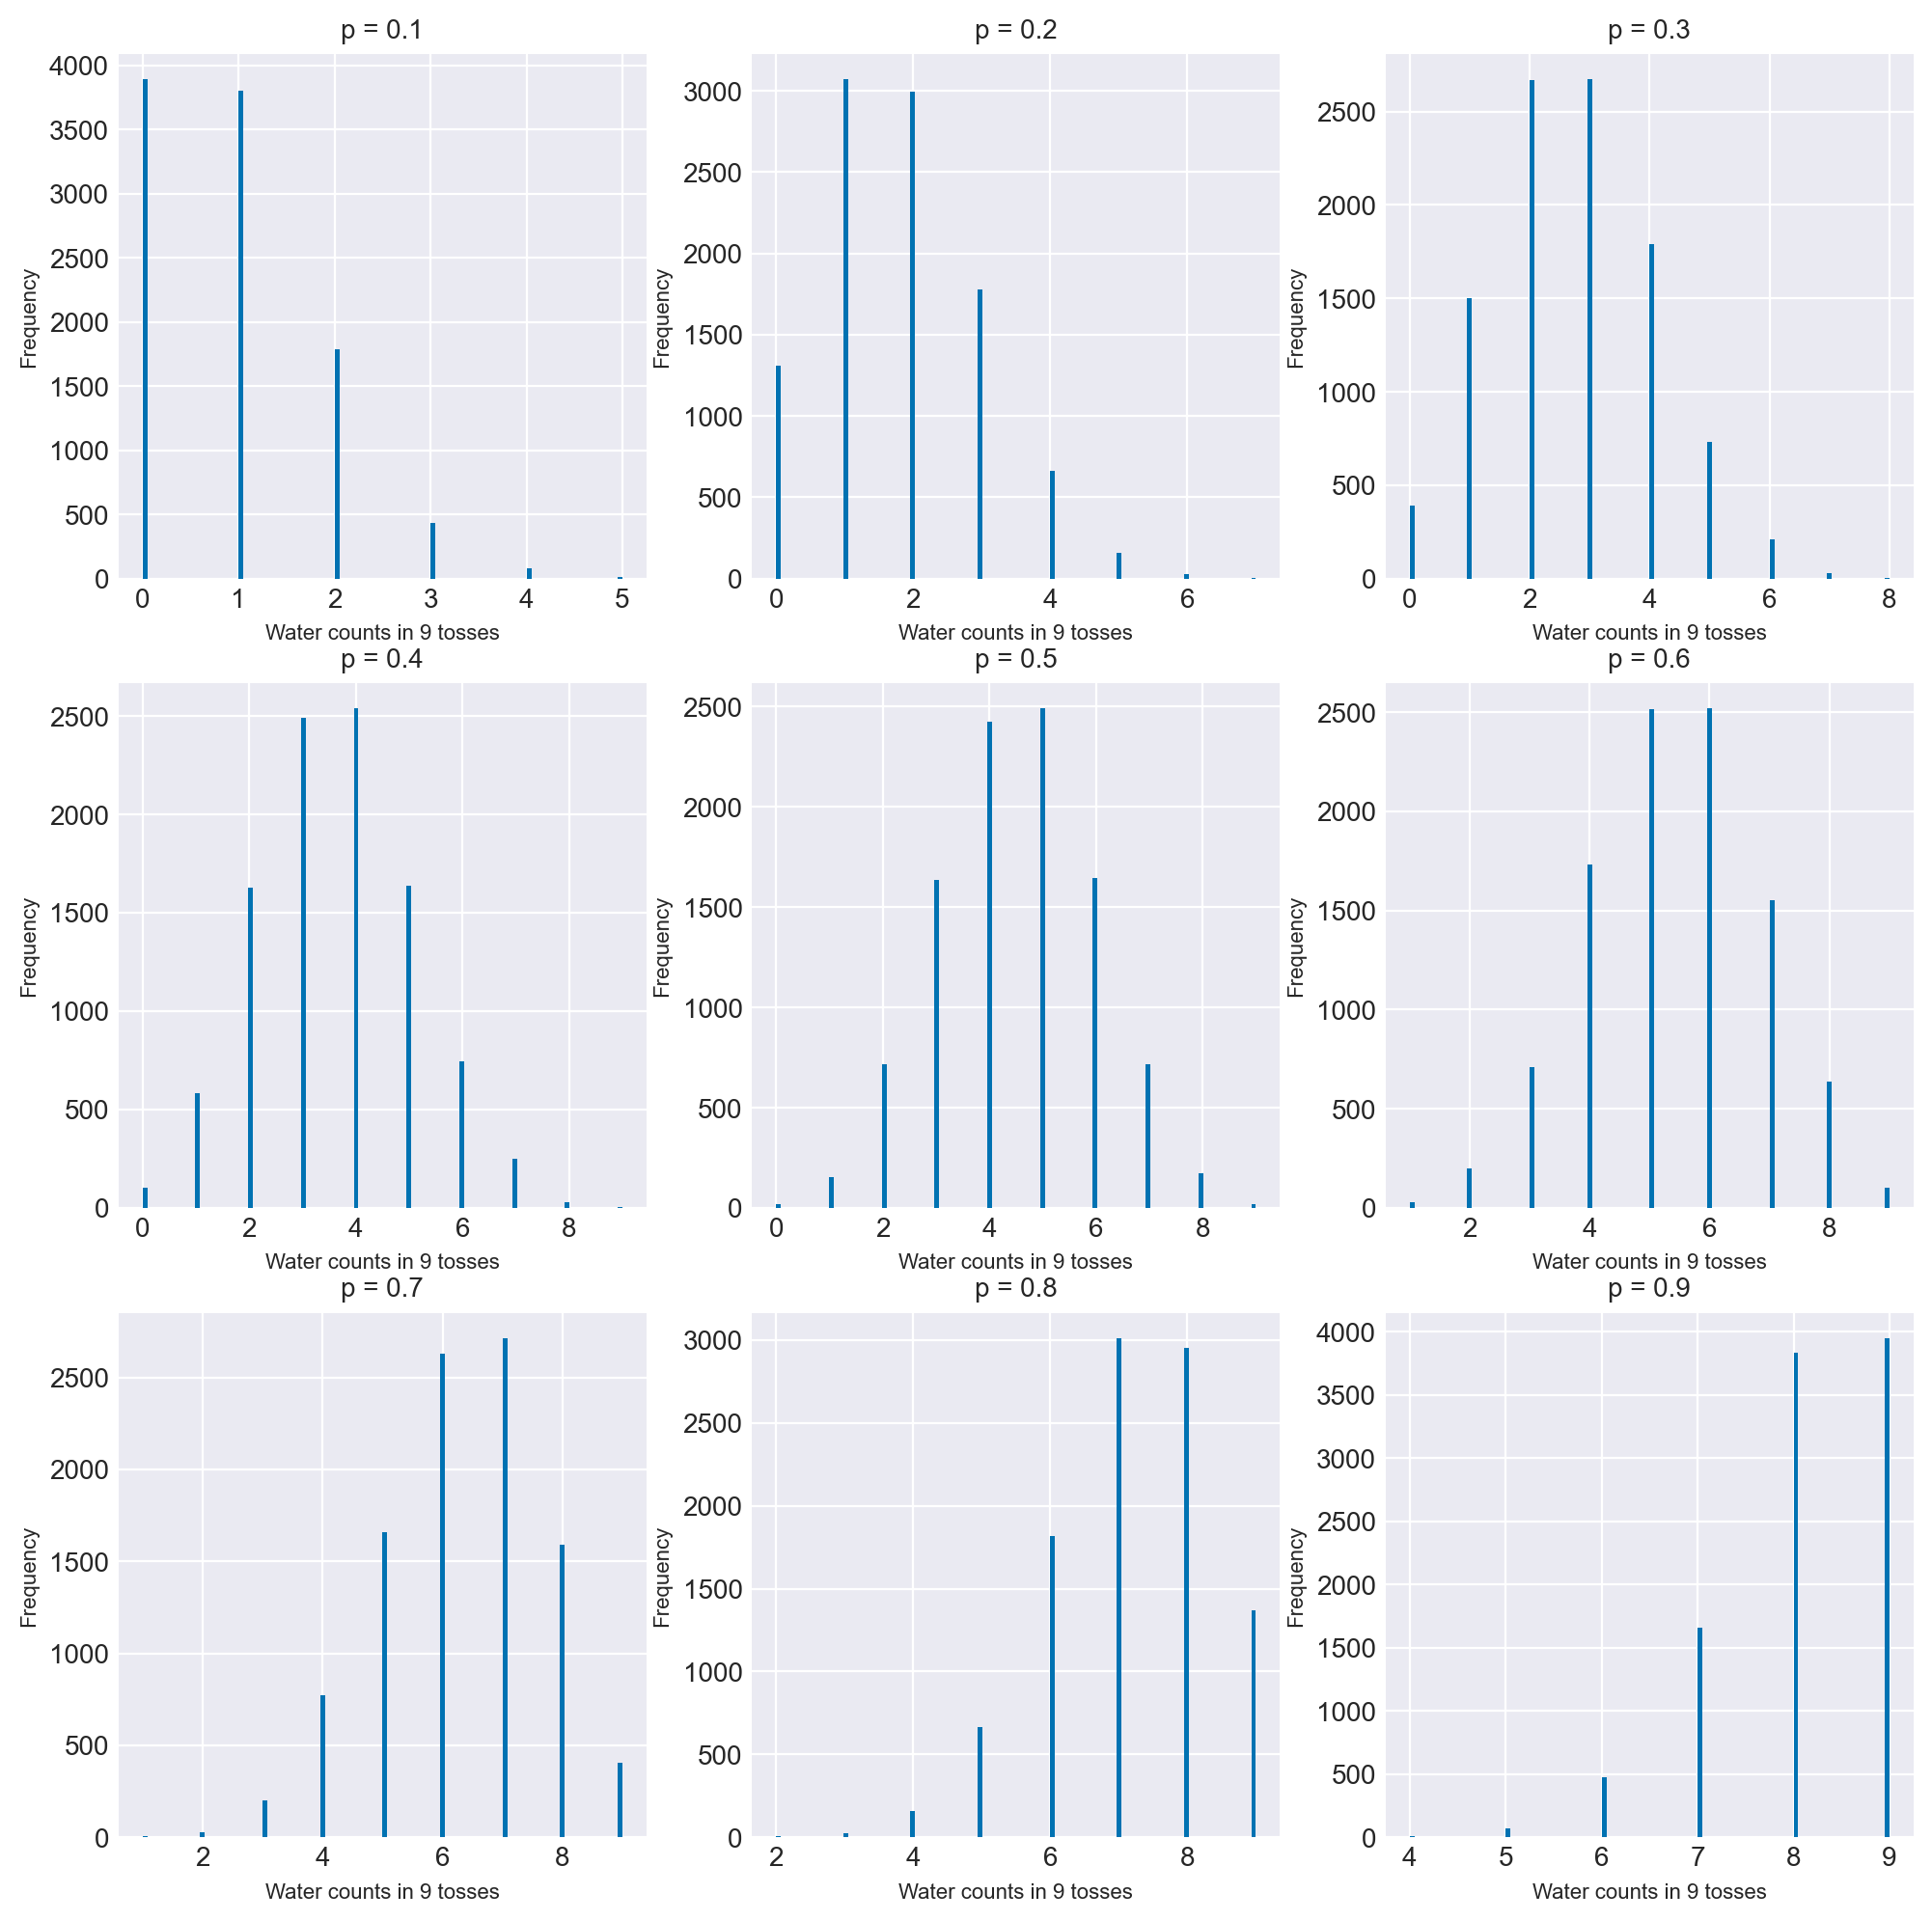

In [292]:
p_values = np.arange(0.1, 1.0, 0.1)  # [0.1, 0.2, ..., 0.9]

# Simulate samples for each p value
samples = [stats.binom.rvs(n=9, p=p, size=int(1e4)) for p in p_values]

# Create a 3x3 grid for the histograms
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3 rows, 3 columns

# Plot each histogram in the corresponding subplot
for ax, p, sample in zip(axes.flatten(), p_values, samples):
    ax.hist(sample, bins=100)
    ax.set_title(f"p = {p:.1f}", fontsize=10)
    ax.set_xlabel('Water counts in 9 tosses', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)


### Turns this into a 1x9 graph so yo ucan see the various outcomes

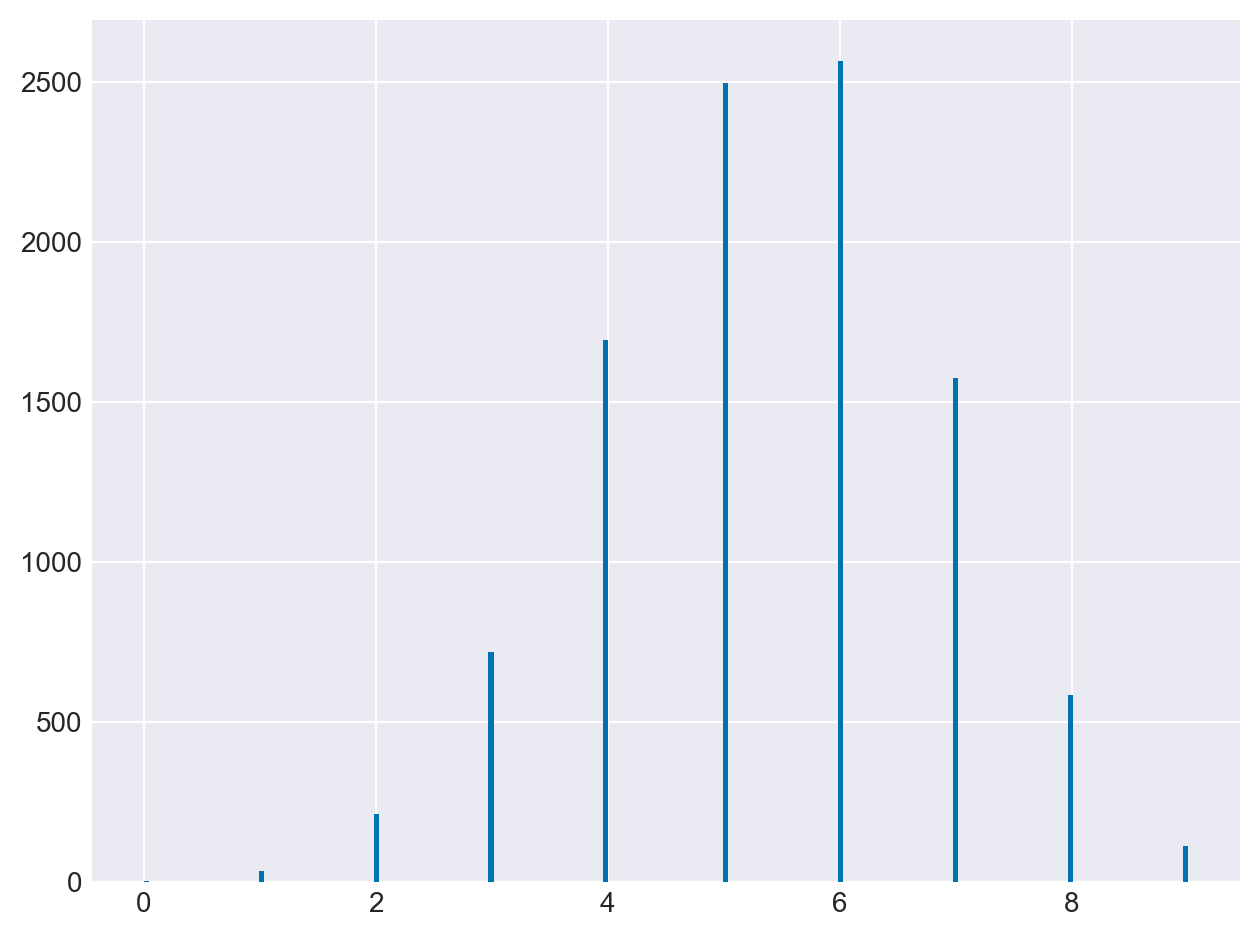

In [290]:
w = stats.binom.rvs(n = 9, p = .6, size = int(1e4))
plt.hist(w, bins = 200)
# Adjust layout
plt.tight_layout()
plt.show()


#### Code 3.27

100


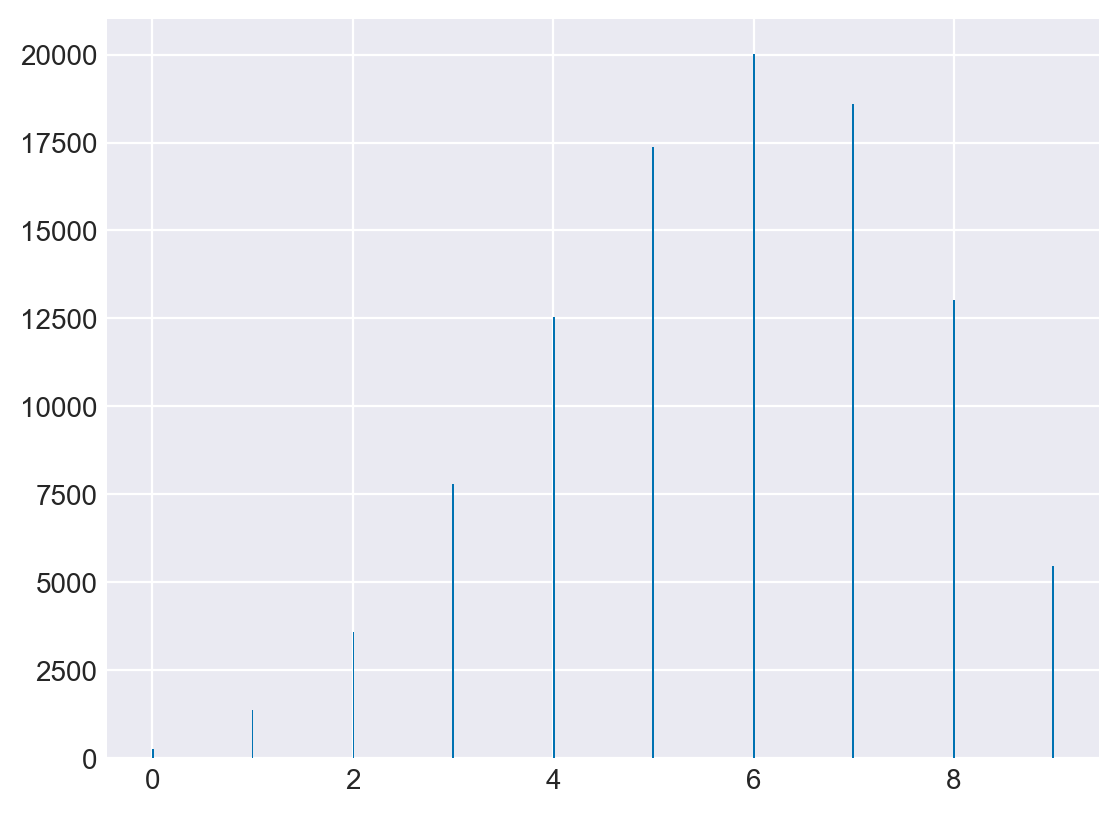

In [287]:
sims = int(1e5)

p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
samples = np.random.choice(p_grid, p=posterior, size=sims, replace=True)
#samples = stats.binom.rvs(n = 9, p = .6, size = int(1e4))
print(len(p_grid))
w = stats.binom.rvs(n=9, p = samples, size = sims)

plt.hist(w, bins = 500);

In [ ]:
import sys, IPython, scipy, matplotlib, platform
print("This notebook was createad on a computer %s running %s and using:\nPython %s\nIPython %s\nPyMC3 %s\nNumPy %s\nSciPy %s\nMatplotlib %s\nSeaborn %s\n" % (platform.machine(), ' '.sys.version[:5], IPython.__version__, pm.__version__, np.__version__, scipy.__version__, matplotlib.__version__, sns.__version__))

<div align="center">

# 3.5. Practice

</div>

In [ ]:
# Here is the grid approximation code needed throughout

def grid_approx(grid_points = 1000, successes = 6, trials = 9):
    
    p_grid = np.linspace(0,1,grid_points)

    prior = np.repeat(1, grid_points)

    likelihood = stats.binom.pmf(successes, trials, p_grid)

    unstd_posterior = likelihood * prior

    posterior = unstd_posterior / unstd_posterior.sum()

    samples = np.random.choice(p_grid, p=posterior, size = int(1e4), replace = True)

    return p_grid, posterior, samples

p_grid, posterior, samples = grid_approx()

birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
                   0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,
                   0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,
                   1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])

birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
                   1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,
                   1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,
                   0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0])



---
#### C3E1

**Question**: 

How much of the posterior probability lies **below** $ \text{p = .2} $?

---
<details>
<summary>Answer</summary>

prob_below_twenty_percent = sum(samples < .2) / len(samples)

0.0007

</details>

---
#### C3E2

**Question**: 

How much of the posterior probability lies **above** $ \text{p = .8} $?

---
<details>
<summary>Answer</summary>

prob_above_eighty_percent = sum(samples > .8) / len(samples)

0.1145

</details>

---
#### C3E3


**Question**: 

How much of the posterior probability lies between $ \text{p = .2} $ and $ \text{p = .8} $?

---
<details>
<summary>Answer</summary>

prob_between_twenty_and_eighty = sum((samples > .2) & (samples < .8)) / len(samples)

0.8711

</details>

---
#### C3E4

**Question**: 
20% of the posterior probability lies **below** which value of $ \text{p} $?

---
<details>
<summary>Answer</summary>

twenty_percent_posterior_prob = np.quantile(samples, .20)

0.51651

</details>

---
#### C3E5

**Question**: 
20% of the posterior probability lies **above** which value of $ \text{p} $?

---
<details>
<summary>Answer</summary>

eighty_percent_posterior_prob = np.quantile(samples, .80)

0.763763

</details>

---
#### C3E6

**Question**: 

Which values of $ \text {p} $ contain the narrowest interval equal to 66% of the posterior probability?

---
<details>
<summary>Answer</summary>

highest_density_probability_interval = az.hdi(samples, hdi_prob=.66)

[0.51151151, 0.78878879]

</details>

---
#### C3E7

**Question**: 

Which values of $ \text {p} $ contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

---
<details>
<summary>Answer</summary>

high_density_interval = np.quantile(samples, [.17, .83])

[0.4984985 , 0.77777778]
</details>

---
#### C3M1

**Question**: 

Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before.

[_Editor's note: See if you can rebuild the grid approx function without referencing it above_]

---
<details>
<summary>Answer</summary>

p_grid, posterior, samples = grid_approx(successes=8, trials=15)

plt.plot(p_grid, posterior);

</details>

---
#### C3M3

**Question**: 

Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for $ \text{p} $.

---
<details>
<summary>Answer</summary>

```p_grid, posterior, samples = grid_approx(successes=8, trials=15)

lower, upper = az.hdi(samples, hdi_prob= .9)

plt.plot(p_grid, posterior, label = 'posterior', color='black');
plt.xlabel('proportion water (p)')
plt.ylabel('Density')
plt.fill_between(p_grid, posterior, where = (p_grid > lower) & (p_grid < upper), label = f'Lower: {lower:.3f}\nUpper: {upper:.3f}');

plt.legend(loc = 'upper left');```

</details>

---
#### C3M4

**Question**: 

Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in $ \text{p} $\. What is the probability of observing 8 water in 15 tosses?


---
<details>
<summary>Answer</summary>

```
p_grid, posterior, samples = grid_approx(successes=8, trials=15)

posterior_predictive_check = stats.binom.rvs(n=15, p = samples, size = int(1e4))

print(sum(posterior_predictive_check == 8) / len(posterior_predictive_check))

plt.hist(posterior_predictive_check, bins = 300);
```
0.1481

</details>

---
#### C3M5a

**Question**: 

 Start over at 3M1, but now use a prior that is zero below $ \text{p = .5} $ and a constant above $ \text {p} $. This corresponds to prior information that a majority of the Earth’s surface is water. Repeat each problem above and compare the inferences. What difference does the better prior make? If it helps, compare inferences (using both priors) to the true value $ \text {p = 7} $.

 Part A:
 
Construct the posterior distribution, using grid approximation.

---
<details>
<summary>Answer</summary>

The simplest way to go about this is to tweak the `grid_approx` function's prior.  In this case we've gone from np.repeat to np.array and used a list function to generate a prior where it's 1 if p_grid is > .5 and 0 if it's below .5

```
def disjunct_prior_grid_approx(grid_points = 1000, successes = 8, trials = 15):
    
    p_grid = np.linspace(0,1,grid_points)

    prior = np.array([1 if p > 0.5 else 0 for p in p_grid])

    likelihood = stats.binom.pmf(successes, trials, p_grid)

    unstd_posterior = likelihood * prior

    posterior = unstd_posterior / unstd_posterior.sum()

    samples = np.random.choice(p_grid, p=posterior, size = int(1e4), replace = True)

    return p_grid, posterior, samples

disjunct_p_grid, disjunct_posterior, disjunct_samples = disjunct_prior_grid_approx()

plt.plot(disjunct_p_grid, disjunct_p_grid);

```
</details>

---
#### C3M5b

**Question**: 

 Start over at 3M1, but now use a prior that is zero below $ \text{p = .5} $ and a constant above $ \text {p} $. This corresponds to prior information that a majority of the Earth’s surface is water. Repeat each problem above and compare the inferences. What difference does the better prior make? If it helps, compare inferences (using both priors) to the true value $ \text {p = 7} $.

 Part B:
 
Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for $ \text {p} $

---
<details>
<summary>Answer</summary>
From here you could literally just copy and paste your previous answers put add the prefix disjunct_ and it will work.  But try to recreate them anew for added practice

```
lower, upper = az.hdi(disjunct_samples, hdi_prob = .9)
[0.5005005 , 0.71171171]
```
</details>

---
#### C3M6c

**Question**: 

 Start over at 3M1, but now use a prior that is zero below 
 and a constant above $ \text {p} $. This corresponds to prior information that a majority of the Earth’s surface is water. Repeat each problem above and compare the inferences. What difference does the better prior make? If it helps, compare inferences (using both priors) to the true value $ \text {p = 7} $.

 Part C:
What is the probability of observing 8 water in 15 tosses?

---
<details>
<summary>Answer</summary>

```
disjunct_posterior_predictive_check = stats.binom.rvs(n = 15, p = disjunct_samples, size = len(samples))

sum(disjunct_posterior_predictive_check == 8) / len(disjunct_posterior_predictive_check)

0.1621
```

</details>

---
#### C3M6d

**Question**: 

 Start over at 3M1, but now use a prior that is zero below 
 and a constant above $ \text {p} $. This corresponds to prior information that a majority of the Earth’s surface is water. Repeat each problem above and compare the inferences. What difference does the better prior make? If it helps, compare inferences (using both priors) to the true value $ \text {p = 7} $.

 Part D:

Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

---
<details>
<summary>Answer</summary>

```
new_disjunct_p_grid, new_disjunct_posterior, new_disjunct_samples = disjunct_prior_grid_approx(successes=6, trials=9)

new_disjunct_posterior_predictive_check = stats.binom.rvs(n=9, p = new_disjunct_samples, size = int(1e4))

print(sum(new_disjunct_posterior_predictive_check == 6) / len(new_disjunct_posterior_predictive_check))

plt.hist(new_disjunct_posterior_predictive_check, bins = 300);

0.2289
```

</details>

---
#### C3M6

**Question**: 

Suppose you want to estimate the Earth’s proportion of water very precisely. Specifically, you want the 99% percentile interval of the posterior distribution of $ \text {p} $ to be only 0.05 wide. This means the distance between the upper and lower bound of the interval should be 0.05. How many times will you have to toss the globe to do this?

---
<details>
<summary>Answer</summary>

This one is relatively slow but it illustrates an important point: much of the learning happens in the beginning and then each improvement is hard fought and takes lots of data.  

Warning: This will take ~25mins to run.


```
def globe_tossing_example():
    finish = False
    tosses = 1
    print(tosses)
    results = []

    while finish == False:
        water_land = stats.binom.rvs(n = 1, p = .7)

        results.append(water_land)
        waters = sum(results)
        _, _, samples = grid_approx(trials = tosses, successes = waters, grid_points = int(1e7)) 
        
        upper, lower = np.percentile(samples, [.5, 99.5])

        # plt.plot(p_grid, posterior)
        # plt.show()
        width = lower - upper
        print(width)

        tosses += 1
        print(tosses)

        if width < .05:
            finish = True
    return tosses

num_tosses = globe_tossing_example()

print(f'You will need {num_tosses} globe tosses before you get to < .05 interval between in the 99 percentile')


```

You will need 2108 globe tosses before you get to < .05 interval between in the 99 percentile

</details>

---
#### C3H1

**Question**: 

Using grid approximation, compute the posterior distribution for the probability of a birth being a boy. Assume a uniform prior probability. Which parameter value maximizes the posterior probability?

Note: birthdata are saved as np.arrays above [birth1, birth2]

---
<details>
<summary>Answer</summary>

```
all_births = sum(birth1) + sum(birth2)

def birth_grid_approx (s, t, gp):

    p_grid = np.linspace(0, 1, gp)

    prior = np.repeat(1, gp)

    likelihood =  stats.binom.pmf(s, t, p_grid)

    unstd_posterior = likelihood * prior

    posterior = unstd_posterior / unstd_posterior.sum()



    return p_grid, posterior

birth_p_grid, birth_posterior = birth_grid_approx(all_births.sum(), len(birth1) + len(birth2), int(100))

MAP =  birth_p_grid[birth_posterior == max(birth_posterior)].item()

print(MAP)

plt.plot(birth_p_grid, birth_posterior);

```

</details>

---
#### C3H2

**Question**: 

Using the `np.random.choice()` function, draw 10000 random parameter values from the posterior distribution you calculated above. Use these samples to estimate the 50%, 89% and 97% highest posterior density intervals.

---
<details>
<summary>Answer</summary>

```
def birth_grid_approx (s, t, gp):

    p_grid = np.linspace(0, 1, gp)

    prior = np.repeat(1, gp)

    likelihood =  stats.binom.pmf(s, t, p_grid)

    unstd_posterior = likelihood * prior

    posterior = unstd_posterior / unstd_posterior.sum()

    samples = np.random.choice(p_grid, p=posterior, size = int(1e4), replace = True)

    return p_grid, posterior, samples

birth_p_grid, birth_posterior, samples = birth_grid_approx(all_births.sum(), len(birth1) + len(birth2), int(100))

MAP =  birth_p_grid[birth_posterior == max(birth_posterior)].item()

plt.hist(samples, bins = 100);

fifty_hdpi_interval = az.hdi(samples, hdi_prob= .50)

eighty_nine_hdpi_interval = az.hdi(samples, hdi_prob= .89)

ninety_seven_hdpi_interval = az.hdi(samples, hdi_prob= .97)

print(f'50% HDPI: {fifty_hdpi_interval}\n89% HDPI: {eighty_nine_hdpi_interval}\n97% HDPI: {ninety_seven_hdpi_interval}')

```

50% HDPI: [0.54545455 0.58585859]
89% HDPI: [0.50505051 0.60606061]
97% HDPI: [0.48484848 0.62626263]

</details>

---
#### C3H3

**Question**: 

Use `stats.binom.rvs()` to simulate 10000 replicates of 200 births. You should end up with 10000 numbers, each one a count of boys out of 200 births. Compare the distribution of predicted numbers of boys to the actual count in the data (111 boys out of 200 births). Does it look like the model fits the data well? That is, does the distribution of predictions include the actual observation as a central, likely outcome?

---
<details>
<summary>Answer</summary>

```
all_births = sum(birth1) + sum(birth2)

def birth_grid_approx (s, t, gp):

    p_grid = np.linspace(0, 1, gp)

    prior = np.repeat(1, gp)

    likelihood =  stats.binom.pmf(s, t, p_grid)

    unstd_posterior = likelihood * prior

    posterior = unstd_posterior / unstd_posterior.sum()

    samples = np.random.choice(p_grid, p=posterior, size = int(1e4), replace = True)

    return p_grid, posterior, samples

birth_p_grid, birth_posterior, samples = birth_grid_approx(all_births.sum(), len(birth1) + len(birth2), int(100))


dummy_births = stats.binom.rvs(n = 200, size = 10000, p = samples)

plt.hist(dummy_births, bins = 200);


mean = np.mean(dummy_births)
median = np.median(dummy_births)

print(f'Median: {median:.3f}\nMean: {mean:.3f}')

```

Median: 111.000
Mean: 110.919

</details>

---
#### C3H4

**Question**: 

Now compare 10000 counts of boys from 100 simulated first-borns only to the number of boys in the first births, `birth1`. How does the model look in this light?

---
<details>
<summary>Answer</summary>

```
def birth_grid_approx (s, t, gp):

    p_grid = np.linspace(0, 1, gp)

    prior = np.repeat(1, gp)

    likelihood =  stats.binom.pmf(s, t, p_grid)

    unstd_posterior = likelihood * prior

    posterior = unstd_posterior / unstd_posterior.sum()

    samples = np.random.choice(p_grid, p=posterior, size = int(1e4), replace = True)

    return p_grid, posterior, samples

birth_p_grid, birth_posterior, samples = birth_grid_approx(birth1.sum(), len(birth1) , int(100))


dummy_births = stats.binom.rvs(n = 200, size = 10000, p = samples)

plt.hist(dummy_births, bins = 200);


mean = np.mean(dummy_births)
median = np.median(dummy_births)

print(f'Median: {median:.3f}\nMean: {mean:.3f}')

```

Median: 102.000
Mean: 101.917
</details>

---
#### C3H5

**Question**: 

The model assumes that sex of first and second births are independent. To check this assumption, focus now on second births that followed female first-borns. Compare 10,000 simulated counts of boys to only those second births that followed girls. To do this correctly, you need to count the number of first-borns who were girls and simulate that many births, 10,000 times. Compare the counts of boys in your simulations to the actual observed count of boys following girls. How does the model look in this light? Any guesses what is going on in these data?

---
<details>
<summary>Answer</summary>

```
indices = np.where(birth1 == 0)

first_birth_girls = sum(birth1 == 0)
second_birth = birth2[indices]

def birth_grid_approx (s, t, gp):

    p_grid = np.linspace(0, 1, gp)

    prior = np.repeat(1, gp)

    likelihood =  stats.binom.pmf(s, t, p_grid)

    unstd_posterior = likelihood * prior

    posterior = unstd_posterior / unstd_posterior.sum()

    samples = np.random.choice(p_grid, p=posterior, size = int(1e4), replace = True)

    return p_grid, posterior, samples

birth_p_grid, birth_posterior, samples = birth_grid_approx(birth2.sum(), len(birth2) , int(100))


dummy_births = stats.binom.rvs(n = first_birth_girls, size = 10000, p = samples)

plt.hist(dummy_births, bins = 200);


mean = np.mean(dummy_births)
median = np.median(dummy_births)

plt.vlines(sum(second_birth), 0, 1000, color='red')

print(f'Median of male births was {median:.3f}\nBut the amount of 2nd birth males is {sum(second_birth)}')
```

Median of male births was 29.000
But the amount of 2nd birth males is 39

</details>